# Grid Congestion Risk Simulation

This notebook simulates low-voltage electricity demand on a synthetic grid and estimates congestion risk. It demonstrates how to:

1. Generate a synthetic low-voltage grid network
2. Create realistic hourly load profiles for households
3. Visualize individual and aggregate electricity consumption
4. Analyze potential transformer congestion

The simulation helps understand how household electricity usage patterns affect the distribution grid and when transformers might become overloaded.

In [1]:
import pandas as pd
import sys
import os
sys.path.append('..')  # Add parent directory to path

# Import from src
from src.grid_model import generate_lv_grid, plot_lv_grid
from src.simulate import generate_hourly_load_profiles_realistic, save_load_profiles
from src.visualize import compute_total_load, plot_total_load, plot_all_houses

# Parameters
N_HOUSES = 50
HOURS = 24
TRANSFORMER_CAPACITY = 110  # kW
TRANSFORMER_ID = "TR_001"
DATA_DIR = "data/generated"

## Step 1: Generate Synthetic Grid

First, we create a synthetic low-voltage grid with 50 houses. This represents a typical residential neighborhood served by a single transformer.

In [2]:
# Generate synthetic grid
G = generate_lv_grid(N_HOUSES)

## Step 2: Plot the Grid

We can visualize the grid structure to understand the network topology. This shows how houses are connected to the transformer through the distribution network.

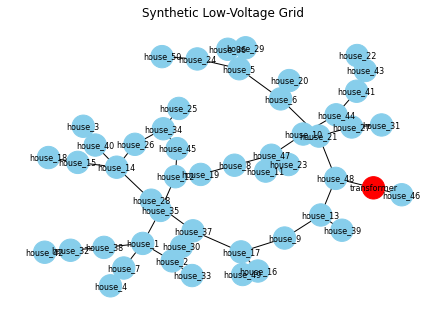

In [3]:
# Plot synthetic grid
plot_lv_grid(G)

## Step 3: Generate Load Profiles

Now we generate realistic hourly electricity consumption profiles for each house. These profiles model typical residential usage patterns with morning and evening peaks.

In [4]:
# Generate synthetic hourly load profiles
house_ids = list(G.nodes())
load_profiles = generate_hourly_load_profiles_realistic(house_ids)

# Create data directory if it doesn't exist
os.makedirs(DATA_DIR, exist_ok=True)

# Save profiles with transformer ID
saved_path = save_load_profiles(
    load_profiles, 
    output_path=DATA_DIR,
    prefix='house',
    start_id=1,
    transformer_id=TRANSFORMER_ID
)

# Load the saved profiles
loaded_profiles = pd.read_csv(saved_path, index_col='house_id')

# Remove transformer column for visualization
if 'transformer_id' in loaded_profiles.columns:
    viz_profiles = loaded_profiles.drop(columns=['transformer_id'])
else:
    viz_profiles = loaded_profiles

Saved load profiles to data/generated/load_profiles_TR_001.csv
Loaded profiles shape: (51, 25)


## Step 4: Visualize Individual House Load Profiles

Let's visualize the electricity consumption patterns for all houses. This shows the diversity of usage patterns across different households, with some common trends like morning and evening peaks.

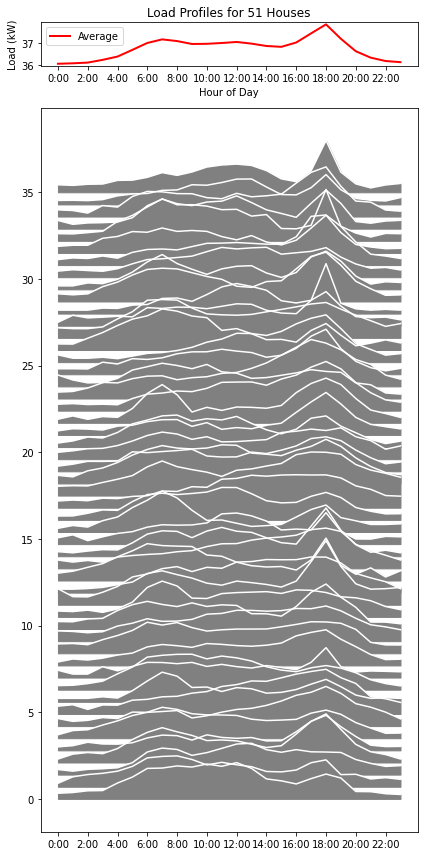

In [5]:
plot_all_houses(viz_profiles)

## Step 5: Analyze Total Grid Load

Finally, we compute the total load on the transformer by summing all household consumption. We then compare this to the transformer's capacity to identify potential congestion issues.

The red dashed line represents the transformer capacity (110 kW). If the total load exceeds this line, the transformer is at risk of overloading, which could lead to equipment damage or power outages.

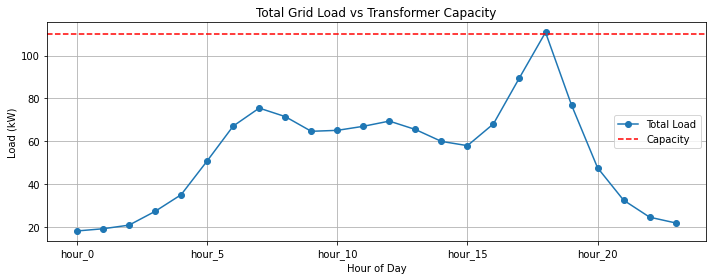

In [6]:
total = compute_total_load(viz_profiles)
plot_total_load(total, transformer_capacity=TRANSFORMER_CAPACITY)

## Conclusion

This simulation demonstrates how to model and analyze electricity demand on a low-voltage distribution grid. Key insights include:

1. Household electricity consumption follows predictable daily patterns with morning and evening peaks
2. The diversity of household behaviors helps smooth the aggregate load profile
3. Transformer congestion risk is highest during peak hours, typically in the evening